In [3]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
plt.style.use('fivethirtyeight')

In [9]:
start = '2010-01-01'
end = '2019-12-31'

# df = pdr.get_data_yahoo('AAPL', 'yahoo', start, end)
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2020-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557463,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624951,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765111,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878097,394024400


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.835594,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.221169,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,71.194130,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.616692,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139946,100805600


In [12]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557463,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624951,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765111,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898557,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878097,394024400


In [14]:
df = df.drop([ 'Date', 'Adj Close'], axis = 1)
df.head ()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


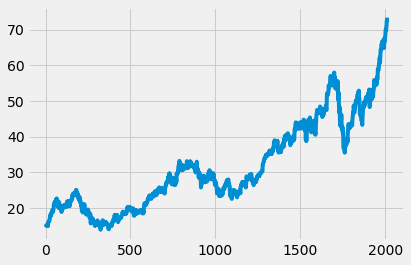

In [15]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    59.401700
2008    59.643125
2009    59.875125
2010    60.106325
2011    60.331875
Name: Close, Length: 2012, dtype: float64

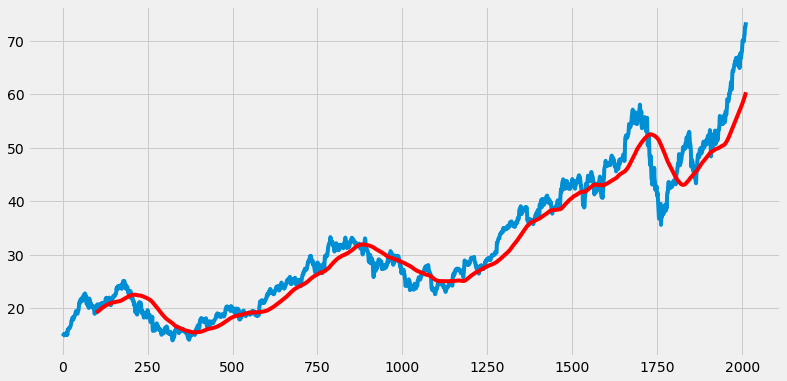

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close) 
plt.plot(ma100, 'r')

In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    54.261513
2008    54.396763
2009    54.529350
2010    54.661100
2011    54.793137
Name: Close, Length: 2012, dtype: float64

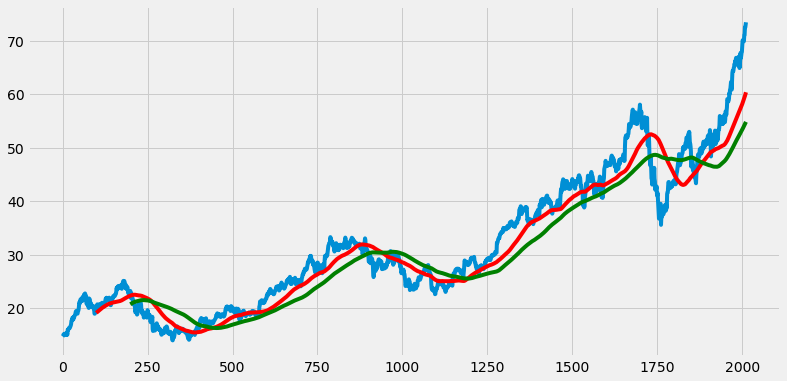

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [23]:
df.shape

(2012, 5)

In [24]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df[ 'Close' ][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df[ 'Close' ][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1408, 1)
(604, 1)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02870454],
       [0.03176911],
       [0.03813405],
       ...,
       [0.96854989],
       [0.97650943],
       [1.        ]])

In [27]:
 
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
from keras.engine.training import Model
#ML MODEL
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add (Dropout (0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add (Dropout (0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
 
model.compile(optimizer='adam', loss = 'mean_squared_error' )
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
41/41 [==============================] - 17s 279ms/step - loss: 0.0510
Epoch 2/50
41/41 [==============================] - 12s 281ms/step - loss: 0.0128
Epoch 3/50
41/41 [==============================] - 12s 283ms/step - loss: 0.0095
Epoch 4/50
41/41 [==============================] - 12s 282ms/step - loss: 0.0091
Epoch 5/50
41/41 [==============================] - 12s 281ms/step - loss: 0.0087
Epoch 6/50
41/41 [==============================] - 12s 282ms/step - loss: 0.0067
Epoch 7/50
41/41 [==============================] - 12s 297ms/step - loss: 0.0076
Epoch 8/50
41/41 [==============================] - 12s 282ms/step - loss: 0.0071
Epoch 9/50
41/41 [==============================] - 12s 283ms/step - loss: 0.0067
Epoch 10/50
41/41 [==============================] - 12s 282ms/step - loss: 0.0071
Epoch 11/50
41/41 [==============================] - 12s 280ms/step - loss: 0.0060
Epoch 12/50
41/41 [==============================] - 12s 283ms/step - loss: 0.0067
Epoch 13/50
4

In [32]:
model.save('keras_model.h5')

In [33]:
data_testing.head()

,Close
1408,40.020000
1409,40.264999
1410,38.830002
1411,39.369999
1412,39.962502


In [34]:
data_training.tail(100)

,Close
1308,35.172501
1309,34.997501
1310,35.365002
1311,34.959999
1312,35.355000
...,...
1403,37.512501
1404,39.285000
1405,38.892502
1406,39.097500


In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [39]:
final_df.head()


,Close
0,35.172501
1,34.997501
2,35.365002
3,34.959999
4,35.355000


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[5.52633845e-03],
       [9.75288718e-04],
       [1.05325428e-02],
       [0.00000000e+00],
       [1.02724261e-02],
       [7.02166210e-03],
       [5.20124221e-03],
       [6.76164464e-03],
       [2.57460944e-02],
       [2.78265317e-02],
       [2.65912256e-02],
       [2.48358844e-02],
       [2.50959019e-02],
       [3.20525844e-02],
       [2.71764385e-02],
       [2.48358844e-02],
       [2.27553479e-02],
       [2.16501000e-02],
       [1.16377906e-02],
       [1.27430385e-02],
       [7.86689248e-03],
       [1.29380764e-02],
       [8.84208200e-03],
       [5.46125968e-03],
       [1.69040124e-02],
       [1.57987645e-02],
       [2.47058261e-02],
       [3.04921820e-02],
       [2.49658436e-02],
       [2.56810156e-02],
       [2.47708057e-02],
       [4.38203342e-02],
       [4.98667076e-02],
       [4.69410398e-02],
       [4.34952379e-02],
       [5.92940025e-02],
       [8.56251114e-02],
       [9.19966802e-02],
       [8.72504933e-02],
       [9.17365635e-02],


In [42]:
input_data.shape

(704, 1)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test. shape)
print (y_test.shape)

(604, 100, 1)
(604,)


In [45]:
# Making Predictions

y_predicted = model.predict(x_test)

In [46]:
y_predicted.shape

(604, 1)

In [47]:
y_test

array([0.13159096, 0.13796243, 0.10064372, 0.11468695, 0.13009564,
       0.14147331, 0.13724726, 0.11715756, 0.11481701, 0.11293161,
       0.12964048, 0.13094077, 0.12632474, 0.13016062, 0.14062808,
       0.1499903 , 0.15285099, 0.15707694, 0.15740204, 0.14459402,
       0.14348877, 0.13926272, 0.12216377, 0.14082312, 0.13666215,
       0.12879525, 0.11988819, 0.13029068, 0.12242378, 0.12281386,
       0.10551987, 0.08809572, 0.07834343, 0.06963141, 0.08647034,
       0.09355698, 0.08738055, 0.09284181, 0.09082635, 0.09518237,
       0.08868084, 0.10109878, 0.10051367, 0.10402445, 0.10441452,
       0.10864058, 0.10506472, 0.11150126, 0.13029068, 0.13412655,
       0.12951043, 0.10493466, 0.1066901 , 0.10616996, 0.11221644,
       0.10773037, 0.11423189, 0.15090051, 0.1747611 , 0.1898446 ,
       0.17586635, 0.18379822, 0.21233993, 0.2237176 , 0.22735844,
       0.23665568, 0.23431512, 0.22644823, 0.22189718, 0.20479813,
       0.19010471, 0.20323783, 0.1970613 , 0.19595605, 0.21650

In [48]:
y_predicted

array([[0.08211416],
       [0.08442825],
       [0.08733603],
       [0.090486  ],
       [0.09358242],
       [0.09652933],
       [0.09938313],
       [0.10217375],
       [0.10475087],
       [0.10694344],
       [0.10863163],
       [0.10989352],
       [0.11087193],
       [0.11166179],
       [0.11235386],
       [0.11309034],
       [0.11404166],
       [0.11532378],
       [0.11699277],
       [0.11902606],
       [0.12124437],
       [0.12344044],
       [0.12541464],
       [0.12691018],
       [0.12789105],
       [0.12839371],
       [0.12843873],
       [0.12800759],
       [0.12719822],
       [0.12608695],
       [0.12475961],
       [0.12318274],
       [0.12121895],
       [0.11873454],
       [0.11565065],
       [0.11211127],
       [0.10841055],
       [0.1047931 ],
       [0.10148183],
       [0.09861231],
       [0.09627384],
       [0.09444235],
       [0.09313755],
       [0.09234443],
       [0.09202754],
       [0.09212127],
       [0.09256572],
       [0.093

In [49]:
scaler.scale_

array([0.02600611])

In [50]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

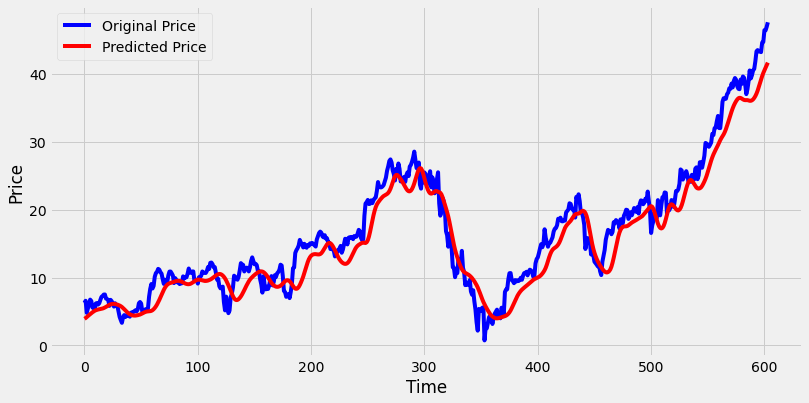

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()